In [14]:
# Семинар 26. Модели бинарного выбора.

import numpy as np # математические операции
import pandas as pd # операции с табличками
import statsmodels.api as sm # модели 
import statsmodels.formula.api as smf # модели 
from sklearn.linear_model import LinearRegression # линейная регрессия без статистики
import seaborn as sns # графики
import matplotlib.pyplot as plt # графики
from statsmodels.iolib.summary2 import summary_col # несколько моделей в одной таблице
from statsmodels.graphics.mosaicplot import mosaic

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

In [15]:
get_ipython().system('pip install rdatasets # наборы данных')
# !pip install yfinance
from rdatasets import data 

In [16]:
# рассмотрим данные о женщинах MROZ
t = pd.read_stata('/Users/polinapogorelova/Downloads/mroz.dta')
t

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq,logw
0,1,1610,1,0,32,12,3.3540,2.65,2708,34,...,0.7215,12,7,5.0,0,14,10.910060,1.210154,196,1.471095
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,...,0.6615,7,7,11.0,1,5,19.499981,0.328512,25,0.870833
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,...,0.6915,12,7,5.0,0,15,12.039910,1.514138,225,1.712987
3,1,456,0,3,34,12,1.0965,3.25,1920,53,...,0.7815,7,7,5.0,0,6,6.799996,0.092123,36,0.740269
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,...,0.6215,12,14,9.5,1,7,20.100058,1.524272,49,1.721301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,0,0,0,2,40,13,0.0000,0.00,3020,43,...,0.6215,10,10,9.5,1,5,28.200001,NaN,25,0.000000
749,0,0,2,3,31,12,0.0000,0.00,2056,33,...,0.7715,12,12,7.5,0,14,10.000000,NaN,196,0.000000
750,0,0,0,0,43,12,0.0000,0.00,2383,43,...,0.7515,10,3,7.5,0,4,9.952000,NaN,16,0.000000
751,0,0,0,0,60,12,0.0000,0.00,1705,55,...,0.6215,12,12,14.0,1,15,24.983999,NaN,225,0.000000


In [17]:
# преобразуем все качественные переменные (кроме зависимой inlf)
for col in ['city']:
  t[col] = pd.Categorical(t[col])

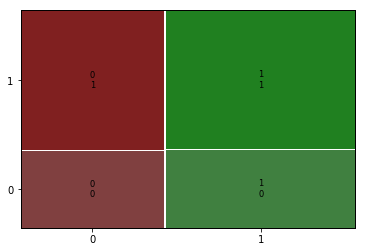

In [18]:
# мозаичный график (для качественных переменных)
mosaic(t, ['inlf', 'city']);

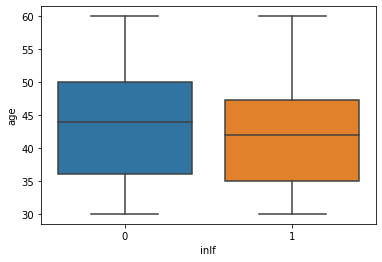

In [19]:
# ящик с усами
sns.boxplot(data=t, x='inlf', y='age');

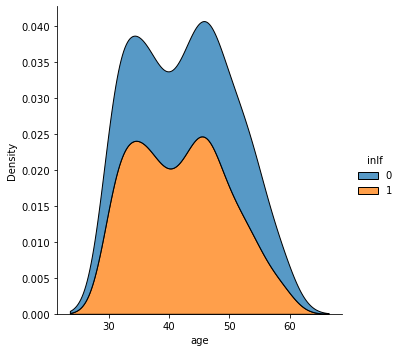

In [20]:
sns.displot(data=t, x='age', kind='kde', hue='inlf', multiple='stack');

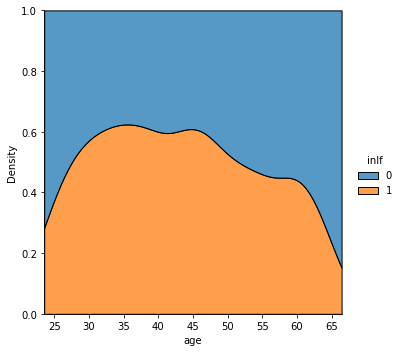

In [21]:
sns.displot(data=t, x='age', kind='kde', hue='inlf', multiple='fill');

In [22]:
# оценим logit модель
fit_logit = smf.logit('inlf ~ educ + exper + expersq + age + kidslt6 + kidsge6 + nwifeinc', data=t).fit()
fit_logit.summary()

Optimization terminated successfully.
         Current function value: 0.533553
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   inlf   No. Observations:                  753
Model:                          Logit   Df Residuals:                      745
Method:                           MLE   Df Model:                            7
Date:                Sun, 09 Apr 2023   Pseudo R-squ.:                  0.2197
Time:                        21:46:42   Log-Likelihood:                -401.77
converged:                       True   LL-Null:                       -514.87
Covariance Type:            nonrobust   LLR p-value:                 3.159e-45
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4255      0.860      0.494      0.621      -1.261       2.112
educ           0.2212      0.043      5.091      0.000       0.136       0.306
exper          0.2059      0.032      6.422      0.000       0.143       0.269
expersq       -0.0032      0.001     -3.104      0.002      -0.005      -0.001
age           -0.0880      0.015     -6.040      0.000      -0.117      -0.059
kidslt6       -1.4434      0.204     -7.090      0.000      -1.842      -1.044
kidsge6        0.0601      0.075      0.804      0.422      -0.086       0.207
nwifeinc      -0.0213      0.008     -2.535      0.011      -0.038      -0.005
==============================================================================
"""

In [23]:
# оценим probit модель
fit_probit = smf.probit('inlf ~ educ + exper + expersq + age + kidslt6 + kidsge6 + nwifeinc', data=t).fit()
fit_probit.summary()

Optimization terminated successfully.
         Current function value: 0.532938
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:                   inlf   No. Observations:                  753
Model:                         Probit   Df Residuals:                      745
Method:                           MLE   Df Model:                            7
Date:                Sun, 09 Apr 2023   Pseudo R-squ.:                  0.2206
Time:                        21:46:42   Log-Likelihood:                -401.30
converged:                       True   LL-Null:                       -514.87
Covariance Type:            nonrobust   LLR p-value:                 2.009e-45
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2701      0.509      0.531      0.595      -0.727       1.267
educ           0.1309      0.025      5.183      0.000       0.081       0.180
exper          0.1233      0.019      6.590      0.000       0.087       0.160
expersq       -0.0019      0.001     -3.145      0.002      -0.003      -0.001
age           -0.0529      0.008     -6.235      0.000      -0.069      -0.036
kidslt6       -0.8683      0.119     -7.326      0.000      -1.101      -0.636
kidsge6        0.0360      0.043      0.828      0.408      -0.049       0.121
nwifeinc      -0.0120      0.005     -2.484      0.013      -0.022      -0.003
==============================================================================
"""

In [24]:
# сравним оценки коэффициентов в logit и probit моделях
summary_col([fit_logit, fit_probit])

,inlf I,inlf II
Intercept,0.4255,0.2701
,(0.8604),(0.5086)
educ,0.2212,0.1309
,(0.0434),(0.0253)
exper,0.2059,0.1233
,(0.0321),(0.0187)
expersq,-0.0032,-0.0019
,(0.0010),(0.0006)
age,-0.0880,-0.0529
,(0.0146),(0.0085)


In [25]:
# создадим новые наблюдения
new = pd.DataFrame({'age': np.arange(5, 100, step=0.5)})
new['educ'] = 10
new['exper'] = 4
new['expersq'] = 16
new['kidslt6'] = 1
new['kidsge6'] = 0
new['nwifeinc'] = 16

In [26]:
new.head()

,age,educ,exper,expersq,kidslt6,kidsge6,nwifeinc
0,5.0,10,4,16,1,0,16
1,5.5,10,4,16,1,0,16
2,6.0,10,4,16,1,0,16
3,6.5,10,4,16,1,0,16
4,7.0,10,4,16,1,0,16


In [27]:
# спрогнозируем для новых женщин вероятность того, что inlf = 1 (будут работать)
new['phat'] = fit_logit.predict(new)
new.head()

,age,educ,exper,expersq,kidslt6,kidsge6,nwifeinc,phat
0,5.0,10,4,16,1,0,16,0.765876
1,5.5,10,4,16,1,0,16,0.757892
2,6.0,10,4,16,1,0,16,0.749725
3,6.5,10,4,16,1,0,16,0.741376
4,7.0,10,4,16,1,0,16,0.732848


In [38]:
logit = sm.genmod.families.links.logit()
probit = sm.genmod.families.links.probit()
binomial = sm.families.Binomial

In [39]:
# рассмотрим альтернативную команду для оценивания моделей бинарного выбора
fit_logit_bis = smf.glm('inlf ~ educ + exper + expersq + age + kidslt6 + kidsge6 + nwifeinc', data=t,
                        family = binomial(logit)).fit()

In [40]:
fit_logit_bis.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   inlf   No. Observations:                  753
Model:                            GLM   Df Residuals:                      745
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -401.77
Date:                Sun, 09 Apr 2023   Deviance:                       803.53
Time:                        21:47:54   Pearson chi2:                     732.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4255      0.860      0.494      0.621      -1.261       2.112
educ           0.2212      0.043      5.091      0.000       0.136       0.306
exper          0.2059      0.032      6.422      0.000       0.143       0.269
expersq       -0.0032      0.001     -3.104      0.002      -0.005      -0.001
age           -0.0880      0.015     -6.040      0.000      -0.117      -0.059
kidslt6       -1.4434      0.204     -7.090      0.000      -1.842      -1.044
kidsge6        0.0601      0.075      0.804      0.422      -0.086       0.207
nwifeinc      -0.0213      0.008     -2.535      0.011      -0.038      -0.005
==============================================================================
"""

In [41]:
preds = fit_logit_bis.get_prediction(new).summary_frame()
preds

,mean,mean_se,mean_ci_lower,mean_ci_upper
0,0.765876,0.098079,0.528248,0.905272
1,0.757892,0.099175,0.520444,0.900294
2,0.749725,0.100202,0.512620,0.895088
3,0.741376,0.101155,0.504780,0.889648
4,0.732848,0.102030,0.496926,0.883966
...,...,...,...,...
185,0.000951,0.000850,0.000165,0.005468
186,0.000910,0.000820,0.000156,0.005305
187,0.000871,0.000791,0.000147,0.005148
188,0.000833,0.000763,0.000139,0.004995


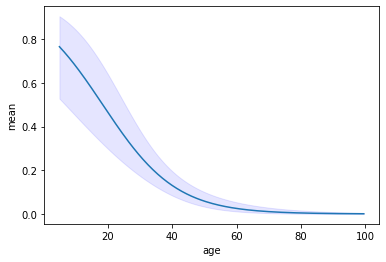

In [42]:
# изобразим на графике зависимость вероятности того, что inlf = 1 от возраста женщины
preds['age'] = new['age']
sns.lineplot(data=preds, x='age', y='mean');
plt.fill_between(preds['age'], preds['mean_ci_lower'], preds['mean_ci_upper'], color='blue', alpha=0.1)

In [43]:
# проверим гипотезу о том, что количество детей младше и старше 6 лет не влияет на вероятность того, что женщина будет работать
# с помощью теста Вальда
hypo = 'kidslt6 = 0, kidsge6 = 0'
fit_logit.wald_test(hypo)

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=[[53.54026164]], p-value=2.3652655374994114e-12, df_denom=2>

In [44]:
# рассчитаем средние предельные эффекты
fit_logit.get_margeff(at='overall').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                   inlf
Method:                          dydx
At:                           overall
==============================================================================
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
educ           0.0395      0.007      5.414      0.000       0.025       0.054
exper          0.0368      0.005      7.139      0.000       0.027       0.047
expersq       -0.0006      0.000     -3.176      0.001      -0.001      -0.000
age           -0.0157      0.002     -6.603      0.000      -0.020      -0.011
kidslt6       -0.2578      0.032     -8.070      0.000      -0.320      -0.195
kidsge6        0.0107      0.013      0.805      0.421      -0.015       0.037
nwifeinc      -0.0038      0.001     -2.571      0.010      -0.007      -0.001
==============================================================================
"""

In [45]:
# рассчитаем предельные эффекты для "среднего" наблюдения
fit_logit.get_margeff(at='mean').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                   inlf
Method:                          dydx
At:                              mean
==============================================================================
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
educ           0.0538      0.011      5.092      0.000       0.033       0.074
exper          0.0501      0.008      6.397      0.000       0.035       0.065
expersq       -0.0008      0.000     -3.096      0.002      -0.001      -0.000
age           -0.0214      0.004     -6.046      0.000      -0.028      -0.014
kidslt6       -0.3509      0.050     -7.070      0.000      -0.448      -0.254
kidsge6        0.0146      0.018      0.804      0.422      -0.021       0.050
nwifeinc      -0.0052      0.002     -2.534      0.011      -0.009      -0.001
==============================================================================
"""

In [46]:
X = t[['educ', 'exper', 'expersq', 'age', 'kidslt6', 'kidsge6', 'nwifeinc']]
y = t['inlf']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)

In [48]:
sk_logit = LogisticRegression(penalty='none',  max_iter=1000).fit(X_train, y_train)

In [49]:
sk_logit.coef_

array([[ 0.23369565,  0.24266178, -0.00431764, -0.09684276, -1.51987061,
         0.05835955, -0.01972794]])

In [50]:
sk_logit.intercept_

array([0.51347541])

In [51]:
prob_pred = sk_logit.predict_proba(X_test)
prob_pred = prob_pred[:, 1]

In [52]:
prob_pred

array([0.76846809, 0.94470067, 0.93133593, 0.62346108, 0.23504335,
       0.91752442, 0.91719988, 0.8320266 , 0.70456353, 0.92292415,
       0.52103883, 0.87106524, 0.82301592, 0.59772907, 0.23540533,
       0.18646745, 0.77104492, 0.20636924, 0.76633065, 0.30848067,
       0.70399737, 0.21367654, 0.07091306, 0.9600996 , 0.62846069,
       0.44327151, 0.8652395 , 0.59544058, 0.63079118, 0.79112589,
       0.14233592, 0.40377942, 0.04857995, 0.54618881, 0.84296143,
       0.96068848, 0.58254983, 0.91479579, 0.89919922, 0.87537608,
       0.93050729, 0.06105931, 0.30323255, 0.39983122, 0.66385527,
       0.92986448, 0.77051853, 0.43605986, 0.9671568 , 0.49361907,
       0.69749997, 0.69828266, 0.91099989, 0.79430692, 0.13411641,
       0.80281808, 0.68643284, 0.82787002, 0.75606514, 0.67800484,
       0.73842717, 0.65101702, 0.80518468, 0.93835694, 0.93188958,
       0.47639261, 0.11694663, 0.21644067, 0.95220381, 0.57738051,
       0.19178104, 0.71297022, 0.40005533, 0.50553914, 0.69248

In [53]:
confusion_matrix(y_test, prob_pred > 0.7)

array([[50, 17],
       [31, 53]])

In [54]:
confusion_matrix(y_test, prob_pred > 0.58)

array([[38, 29],
       [21, 63]])

<AxesSubplot:>

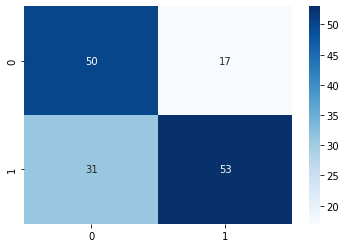

In [55]:
# матрица сопряженности
sns.heatmap(confusion_matrix(y_test, prob_pred > 0.7), annot=True, fmt='d', cmap='Blues')

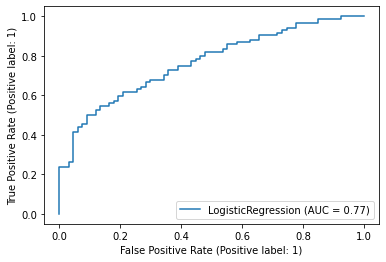

In [56]:
# построим ROC-кривую
# x: FPR = FP / (FP + TN) = FP / condition Negative
# Специфичность = 1 - FPR
# y: TPR = TP / (TP + FN) = TP / condition Positive
# Чувствительность = TPR
plot_roc_curve(sk_logit, X_test, y_test);

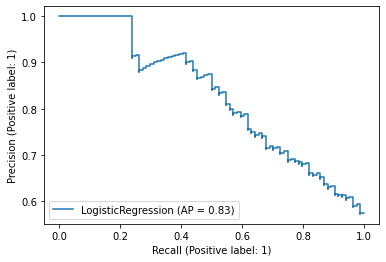

In [57]:
plot_precision_recall_curve(sk_logit, X_test, y_test);

# Recall = TPR = TP / condition Positive
# precision = TP / predicted Positive